<a href="https://colab.research.google.com/github/Guillermo-Marin11/Coder-House/blob/main/ProyectoDS_Parte1_Marin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TRABAJO FINAL - CALIDAD DEL AGUA**

**GUILLERMO MARÍN**

---



**INTRODUCCIÓN**

Este dataset abarca una amplia gama de características físicas del agua, que incluyen parámetros como el pH, la turbidez y la conductividad eléctrica. Estos datos son fundamentales para evaluar la composición y la claridad del agua, lo que a su vez tiene implicaciones directas en su potabilidad y su capacidad para sostener la vida acuática.

**OBJETIVO**

El objetivo fundamental de este dataset es proporcionar información precisa sobre los diversos parámetros de las muestras tomadas para evaluar la seguridad para el consumo humano.

**CONTEXTO COMERCIAL**

Debido a la importancia que tiene este recurso no renovable en nuestra vida se debe verificar que la calidad de la misma sea idónea para cualquier ámbito, abriendo así oportunidades de mejoras a las empresas dedicadas al tratamiento de dicho recurso.

**HIPÓTESIS**


*   Determinar la cantidad de muestras potables con respecto al total de las mismas.
*   Dado que el agua pura (no ionizada) tiene un pH de 7.0, mas del 50% de las muestras de agua tiene un pH entre 6.5 y 8.5.
*  Verificar si todas las muestras que tengan un pH entre 6.5 y 9.5 son potables.


**DESCRIPCIÓN DE LOS DATOS**

0. ph: Concentración de iones de hidrógeno
1. HAR(Hardness): concentración de compuestos minerales
2. SOL(Solids): Solidos disueltos en el agua
3. CHL(Chloramines): es un compuesto químico (Por lo general se utiliza como una solución diluida con función desinfectante)
4. SUL(Sulfate): cantidad de sulfato en el agua (en pequeñas cantidades no son tóxicos)
5. CON(Conductivity): conductividad electrica del agua, es la capacidad de la misma para transportar la corriente electrica.
6. ORG(Organic_carbon): Presencia de materia organica en el agua
7. TRI(Trihalometh): Subproductos de la desifección que se forman cuando se emplea el cloro como desinfectante.
8. TUR(Turbidity): La turbidez es una medida de la claridad del agua.
9. COL(Color): Color del agua.
10. SOU(Source): Fuende de donde se extrajo la muestra.
11. POT(Potability): Ptabilidad del agua

In [91]:
# Importamos las diferentes librerias con las cuales vamos a estar trabajando
# durante la investigación

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
url='https://raw.githubusercontent.com/Guillermo-Marin11/Coder-House/main/Agua%20Calidad1.csv'
df= pd.read_csv(url,sep=';',header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,Ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Color,Source,Potability
1,NaN,"2,05E+15","2,08E+16","7,30E+15","3,69E+16","5,64E+15","1,04E+14","8,70E+14","2,96E+16",Colorless,Lake,0
2,"3,72E+14","1,29E+16","1,86E+16","6,64E+12",NaN,"5,93E+15","1,52E+16","5,63E+15","4,50E+15",Faint Yellow,River,0
3,"8,10E+15","2,24E+16","1,99E+16","9,28E+15",NaN,"4,19E+15","1,69E+16","6,64E+15","3,06E+16",Light Yellow,Ground,0
4,"8,32E+15","2,14E+16","2,20E+16","8,06E+14","3,57E+16","3,63E+15","1,84E+16","1,00E+16","4,63E+15",Near Colorless,Spring,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3272,"4,67E+15","1,94E+16","4,76E+15","7,17E+15","3,60E+13","5,26E+15","1,39E+16","6,67E+15","4,44E+13",Faint Yellow,Well,1
3273,"7,81E+16","1,94E+16","1,73E+16","8,06E+15",NaN,"3,92E+15","1,99E+15",NaN,"2,80E+16",Faint Yellow,Stream,1
3274,"9,42E+14","1,76E+16","3,32E+16","7,35E+15",NaN,"4,32E+16","1,10E+16","6,98E+15","3,30E+15",Near Colorless,River,1
3275,"5,13E+16","2,31E+16","1,20E+16","6,30E+15",NaN,"4,03E+14","1,12E+16","7,75E+15","4,71E+15",Colorless,Reservoir,1


In [92]:
# Eliminamos la primera fila de nuestro DS debido a que no nos aporta ningun
# tipo de valor dentro de la investigación

df = df.drop(0)

In [93]:
# Remombramos las columnas para un mejor manejo de los datos

df= df.rename(columns={0: "PH", 1: "HAR", 2: "SOL", 3: "CHL", 4: "SUL", 5: "CON", 6: "ORG",
                       7: "TRI", 8: "TUR", 9: "COL", 10: "SOU", 11: "POT"})
df

,PH,HAR,SOL,CHL,SUL,CON,ORG,TRI,TUR,COL,SOU,POT
1,NaN,"2,05E+15","2,08E+16","7,30E+15","3,69E+16","5,64E+15","1,04E+14","8,70E+14","2,96E+16",Colorless,Lake,0
2,"3,72E+14","1,29E+16","1,86E+16","6,64E+12",NaN,"5,93E+15","1,52E+16","5,63E+15","4,50E+15",Faint Yellow,River,0
3,"8,10E+15","2,24E+16","1,99E+16","9,28E+15",NaN,"4,19E+15","1,69E+16","6,64E+15","3,06E+16",Light Yellow,Ground,0
4,"8,32E+15","2,14E+16","2,20E+16","8,06E+14","3,57E+16","3,63E+15","1,84E+16","1,00E+16","4,63E+15",Near Colorless,Spring,0
5,"9,09E+15","1,81E+16","1,80E+15","6,55E+15","3,10E+16","3,98E+16","1,16E+16","3,20E+16","4,08E+15",Light Yellow,Stream,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3272,"4,67E+15","1,94E+16","4,76E+15","7,17E+15","3,60E+13","5,26E+15","1,39E+16","6,67E+15","4,44E+13",Faint Yellow,Well,1
3273,"7,81E+16","1,94E+16","1,73E+16","8,06E+15",NaN,"3,92E+15","1,99E+15",NaN,"2,80E+16",Faint Yellow,Stream,1
3274,"9,42E+14","1,76E+16","3,32E+16","7,35E+15",NaN,"4,32E+16","1,10E+16","6,98E+15","3,30E+15",Near Colorless,River,1
3275,"5,13E+16","2,31E+16","1,20E+16","6,30E+15",NaN,"4,03E+14","1,12E+16","7,75E+15","4,71E+15",Colorless,Reservoir,1


In [94]:
# Debido a un error en la configuración de nuestro DS madre, realizamos una
# modificación en los valores, siendo este el correcto formato del valor

df["PH"] = df["PH"].str.slice(0,4)
df["HAR"] = df["HAR"].str.slice(0,4)
df["SOL"] = df["SOL"].str.slice(0,4)
df["CHL"] = df["CHL"].str.slice(0,4)
df["SUL"] = df["SUL"].str.slice(0,4)
df["CON"] = df["CON"].str.slice(0,4)
df["ORG"] = df["ORG"].str.slice(0,4)
df["TRI"] = df["TRI"].str.slice(0,4)
df["TUR"] = df["TUR"].str.slice(0,4)
df

,PH,HAR,SOL,CHL,SUL,CON,ORG,TRI,TUR,COL,SOU,POT
1,NaN,"2,05","2,08","7,30","3,69","5,64","1,04","8,70","2,96",Colorless,Lake,0
2,"3,72","1,29","1,86","6,64",NaN,"5,93","1,52","5,63","4,50",Faint Yellow,River,0
3,"8,10","2,24","1,99","9,28",NaN,"4,19","1,69","6,64","3,06",Light Yellow,Ground,0
4,"8,32","2,14","2,20","8,06","3,57","3,63","1,84","1,00","4,63",Near Colorless,Spring,0
5,"9,09","1,81","1,80","6,55","3,10","3,98","1,16","3,20","4,08",Light Yellow,Stream,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3272,"4,67","1,94","4,76","7,17","3,60","5,26","1,39","6,67","4,44",Faint Yellow,Well,1
3273,"7,81","1,94","1,73","8,06",NaN,"3,92","1,99",NaN,"2,80",Faint Yellow,Stream,1
3274,"9,42","1,76","3,32","7,35",NaN,"4,32","1,10","6,98","3,30",Near Colorless,River,1
3275,"5,13","2,31","1,20","6,30",NaN,"4,03","1,12","7,75","4,71",Colorless,Reservoir,1


In [95]:
# Pasamos a visualizar la información de nuestro dataset para verificar si
# tenemos que realizar alguna modificicación en el mismo

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 1 to 3276
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   PH      2785 non-null   object
 1   HAR     3276 non-null   object
 2   SOL     3276 non-null   object
 3   CHL     3276 non-null   object
 4   SUL     2495 non-null   object
 5   CON     3276 non-null   object
 6   ORG     3276 non-null   object
 7   TRI     3114 non-null   object
 8   TUR     3276 non-null   object
 9   COL     3276 non-null   object
 10  SOU     3276 non-null   object
 11  POT     3276 non-null   object
dtypes: object(12)
memory usage: 307.3+ KB


In [96]:
# Como pudimos visualizar en la consulta anterior, tenemos una proporción de
# datos faltantes, se tomó la decisión de eliminar estos sin alterar el obejtivo
# de la investigación

df.dropna(inplace=True)
df

,PH,HAR,SOL,CHL,SUL,CON,ORG,TRI,TUR,COL,SOU,POT
4,"8,32","2,14","2,20","8,06","3,57","3,63","1,84","1,00","4,63",Near Colorless,Spring,0
5,"9,09","1,81","1,80","6,55","3,10","3,98","1,16","3,20","4,08",Light Yellow,Stream,0
6,"5,58","1,88","2,87","7,54","3,27","2,80","8,40","5,49","2,56",Near Colorless,Aquifer,0
7,"1,02","2,48","2,87","7,51","3,94","2,84","1,38","8,46","2,67",Light Yellow,River,0
8,"8,64","2,03","1,37","4,56","3,03","4,75","1,24","6,28","4,40",Colorless,Spring,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3268,"8,99","2,15","1,59","6,30","3,13","3,90","9,90","5,51","4,61",Near Colorless,Ground,1
3269,"6,70","2,07","1,72","7,71","3,05","3,29","1,62","2,89","3,44",Near Colorless,Spring,1
3270,"1,15","9,48","3,72","9,26","2,59","4,40","1,62","4,16","4,37",Colorless,Lake,1
3271,"6,07","1,87","2,61","7,75","3,46","4,16","1,21","6,04","3,67",Near Colorless,Ground,1


In [59]:
# Reseteamos el index de nuestro DS para que nuestros datos sigan un orden

df_reindexado = df.reset_index(drop=True)
df_reindexado

,PH,HAR,SOL,CHL,SUL,CON,ORG,TRI,TUR,COL,SOU,POT
0,"8,32","2,14","2,20","8,06","3,57","3,63","1,84","1,00","4,63",Near Colorless,Spring,0
1,"9,09","1,81","1,80","6,55","3,10","3,98","1,16","3,20","4,08",Light Yellow,Stream,0
2,"5,58","1,88","2,87","7,54","3,27","2,80","8,40","5,49","2,56",Near Colorless,Aquifer,0
3,"1,02","2,48","2,87","7,51","3,94","2,84","1,38","8,46","2,67",Light Yellow,River,0
4,"8,64","2,03","1,37","4,56","3,03","4,75","1,24","6,28","4,40",Colorless,Spring,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2006,"8,99","2,15","1,59","6,30","3,13","3,90","9,90","5,51","4,61",Near Colorless,Ground,1
2007,"6,70","2,07","1,72","7,71","3,05","3,29","1,62","2,89","3,44",Near Colorless,Spring,1
2008,"1,15","9,48","3,72","9,26","2,59","4,40","1,62","4,16","4,37",Colorless,Lake,1
2009,"6,07","1,87","2,61","7,75","3,46","4,16","1,21","6,04","3,67",Near Colorless,Ground,1


In [60]:
# Reemplazamos la ',' por el '.' debido a que con la ',' no nos estaba tomando
# el tipo de dato correcto

df = df_reindexado.replace(',','.', regex=True)
df

,PH,HAR,SOL,CHL,SUL,CON,ORG,TRI,TUR,COL,SOU,POT
0,8.32,2.14,2.20,8.06,3.57,3.63,1.84,1.00,4.63,Near Colorless,Spring,0
1,9.09,1.81,1.80,6.55,3.10,3.98,1.16,3.20,4.08,Light Yellow,Stream,0
2,5.58,1.88,2.87,7.54,3.27,2.80,8.40,5.49,2.56,Near Colorless,Aquifer,0
3,1.02,2.48,2.87,7.51,3.94,2.84,1.38,8.46,2.67,Light Yellow,River,0
4,8.64,2.03,1.37,4.56,3.03,4.75,1.24,6.28,4.40,Colorless,Spring,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2006,8.99,2.15,1.59,6.30,3.13,3.90,9.90,5.51,4.61,Near Colorless,Ground,1
2007,6.70,2.07,1.72,7.71,3.05,3.29,1.62,2.89,3.44,Near Colorless,Spring,1
2008,1.15,9.48,3.72,9.26,2.59,4.40,1.62,4.16,4.37,Colorless,Lake,1
2009,6.07,1.87,2.61,7.75,3.46,4.16,1.21,6.04,3.67,Near Colorless,Ground,1


In [61]:
# Realizamos la modificación en los tipos de datos que tenemos en nuestro DS

df['PH'] = df['PH'].astype(float)
df['HAR'] = df['HAR'].astype(float)
df['SOL'] = df['SOL'].astype(float)
df['CHL'] = df['CHL'].astype(float)
df['SUL'] = df['SUL'].astype(float)
df['CON'] = df['CON'].astype(float)
df['ORG'] = df['ORG'].astype(float)
df['TRI'] = df['TRI'].astype(float)
df['TUR'] = df['TUR'].astype(float)
df['COL'] = df['COL'].astype('category')
df['SOU'] = df['SOU'].astype('category')
df['POT'] = df['POT'].astype('category')

In [102]:
# Volvemos a consultar la información del DS para verificar que nuestra
# modificiación fue correcta

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2011 entries, 4 to 3272
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   PH      2011 non-null   object
 1   HAR     2011 non-null   object
 2   SOL     2011 non-null   object
 3   CHL     2011 non-null   object
 4   SUL     2011 non-null   object
 5   CON     2011 non-null   object
 6   ORG     2011 non-null   object
 7   TRI     2011 non-null   object
 8   TUR     2011 non-null   object
 9   COL     2011 non-null   object
 10  SOU     2011 non-null   object
 11  POT     2011 non-null   object
dtypes: object(12)
memory usage: 204.2+ KB


In [105]:
df.describe().round(2)

,PH,HAR,SOL,CHL,SUL,CON,ORG,TRI,TUR,COL,SOU,POT
count,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011
unique,589,189,436,609,230,365,281,614,362,5,8,2
top,"1,03","1,98","1,85","1,01","3,19","4,13","1,42","6,37","3,92",Colorless,Ground,0
freq,13,38,16,12,30,18,32,13,20,703,276,1200


In [106]:
df.describe(include='category')

ValueError: No objects to concatenate

In [65]:
df.shape

(2011, 12)

In [66]:
## Conteo de datos por origen de extracción para poder realizar un
## grafico piechart

conteoxsou = df['SOU'].value_counts()
print(conteoxsou)

SOU
Ground       276
Stream       271
River        265
Reservoir    256
Spring       241
Aquifer      239
Well         233
Lake         230
Name: count, dtype: int64


In [67]:
## Extracción de datos únicos por origen de extracción para la realziación
## del piechart

sounicos = df['SOU'].unique()
sounicos

['Spring', 'Stream', 'Aquifer', 'River', 'Reservoir', 'Lake', 'Ground', 'Well']
Categories (8, object): ['Aquifer', 'Ground', 'Lake', 'Reservoir', 'River', 'Spring', 'Stream', 'Well']

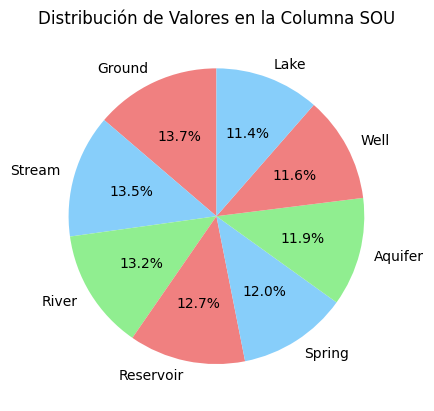

In [68]:
## Gráfico univariado de variable categórica
## En este piechart podemos observar en porcentaje las cantidades de datos
## por origen de extracción que se utilizaron para el análisis

conteoxsou.plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue', 'lightgreen'])
plt.title('Distribución de Valores en la Columna SOU')
plt.ylabel('')  # Opcional: eliminar la etiqueta del eje y
plt.show()

**ANÁLISIS DEL GRÁFICO**

La realización del gráfico anterior es simplemente para visualizar qué porcentajes de cada punto de estracción conforman el total de las muestras.

In [69]:
# Procedemos a contar las muestras potables y no potables de nuestra investigación

counts = df['POT'].value_counts()
print(counts)

POT
0    1200
1     811
Name: count, dtype: int64


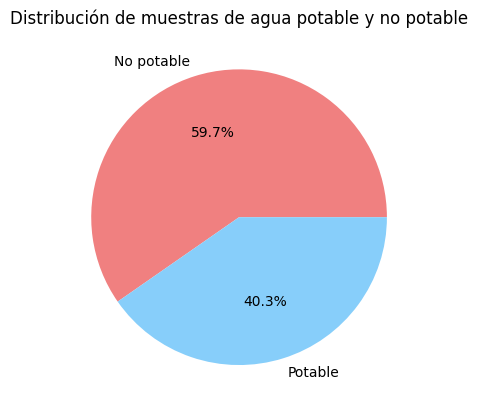

In [70]:
counts.plot.pie(autopct='%1.1f%%', labels=['No potable', 'Potable'], colors=['lightcoral', 'lightskyblue'])
plt.title('Distribución de muestras de agua potable y no potable')
plt.ylabel('')  # Opcional: eliminar la etiqueta del eje y
plt.show()

**ANÁLISIS DEL GRÁFICO**

Gracias al gráfico anterior podemos visualizar que mas del 50% de las muestras que se tomaron no son aptas para el consumo humano.

In [71]:
df['POT'] = df['POT'].replace({0: 'No potable', 1:'Potable'})
muestrasxsou = df.groupby(['SOU', 'POT']). size()
muestrasxsou = muestrasxsou.unstack().fillna(0)
print("Cantidad de muestras potables y no potables por origen de extracción")
muestrasxsou

Cantidad de muestras potables y no potables por origen de extracción


POT,0,1
SOU,,
Aquifer,126,113
Ground,165,111
Lake,142,88
Reservoir,160,96
River,163,102
Spring,144,97
Stream,169,102
Well,131,102


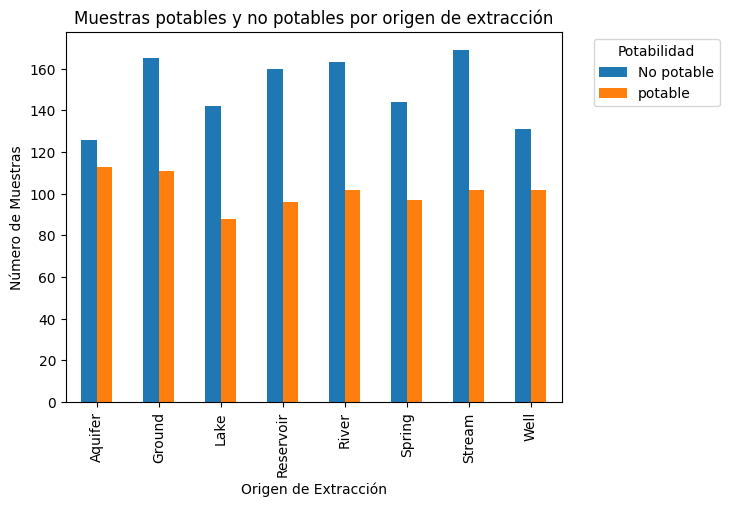

In [72]:
counts = df.groupby(['SOU', 'POT']).size().unstack(fill_value=0)

# Crear el gráfico de barras
counts.plot(kind='bar', stacked=False)
plt.title('Muestras potables y no potables por origen de extracción')
plt.xlabel('Origen de Extracción')
plt.ylabel('Número de Muestras')
plt.legend(title='Potabilidad', labels=['No potable', 'potable'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**ANÁLISIS DEL GRÁFICO**

Podemos visualizar en la tabla y el gráfico anterior de una manera mas sencilla los resultados con respecto al origen de las muestras, ya sean potables o no potables.

Tenemos que del 'aquifer' (acuifero) se obtuvo la mayor cantidad de muestras  potables (113), representando un 47,28% con respecto al total de las mismas.

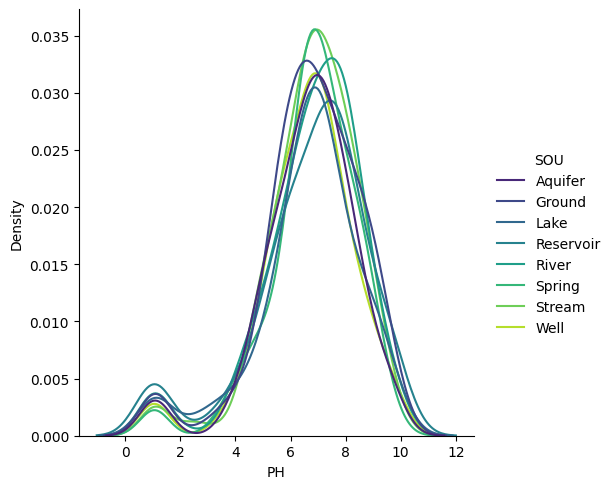

In [73]:
## Gráfico bivariado. Asociación entre una variabale categórica y
## una cuantitativa.
## En el siguiente gráfico podemos visualizar que la distribución del pH
## según el origen de extracción es muy similar en cada variable.

sns.displot(data=df, x="PH", hue="SOU", kind="kde", multiple="layer", palette="viridis")
plt.show()

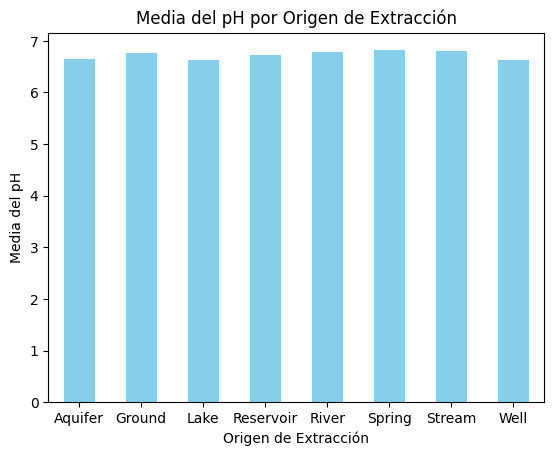

In [74]:
# Calcular la media del pH para cada origen de extracción
mean_ph_by_origin = df.groupby('SOU')['PH'].mean()

# Crear el gráfico de barras
mean_ph_by_origin.plot(kind='bar', color='skyblue')
plt.title('Media del pH por Origen de Extracción')
plt.xlabel('Origen de Extracción')
plt.ylabel('Media del pH')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje X
plt.show()

<ipython-input-75-92526c33d169>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SOU', y= 'PH', data=df, palette="viridis")


Text(0, 0.5, 'pH')

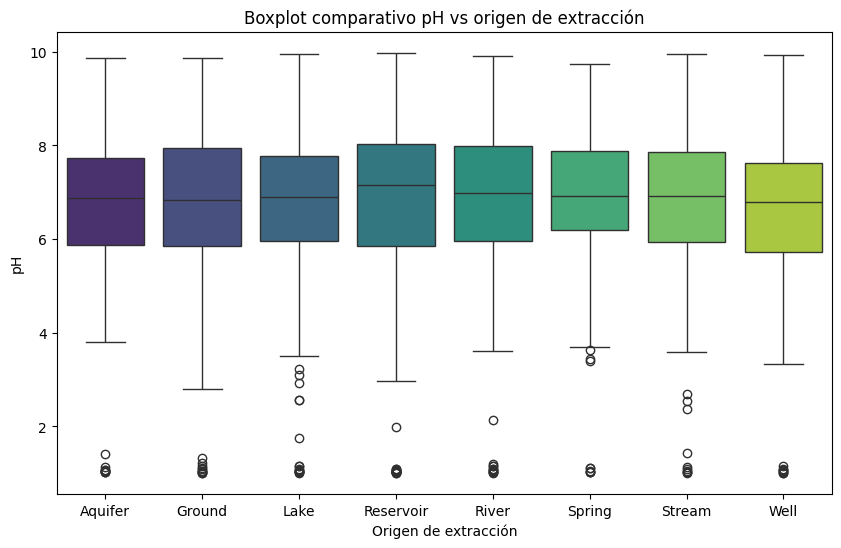

In [75]:
plt.figure(figsize=(10,6))
sns.boxplot(x='SOU', y= 'PH', data=df, palette="viridis")
plt.title('Boxplot comparativo pH vs origen de extracción')
plt.xlabel('Origen de extracción')
plt.ylabel('pH')

**MEDIDAS DE RESUMEN**

In [76]:
promedio = df.PH.mean() # promedio o media
mediana = df.PH.median() # mediana o Q2
moda = df.PH.mode() # moda
primer_cuartil = df.PH.quantile(0.25) # Q1 cuartíl 1 --> percentíl 25
tercer_cuartil = df.PH.quantile(0.75) # Q3 cuartíl 2 --> percentíl 75
percentil_99 = df.PH.quantile(0.99) # percentíl 99

# Imprimir los resultados
print("Promedio: ", promedio)
print("Mediana: ", mediana)
print("Moda: ", moda)
print("Primer cuartil: ", primer_cuartil)
print("Tercer cuartil: ", tercer_cuartil)
print("Percentil 99: ", percentil_99)

Promedio:  6.730154152163103
Mediana:  6.92
Moda:  0    1.03
Name: PH, dtype: float64
Primer cuartil:  5.9
Tercer cuartil:  7.89
Percentil 99:  9.839


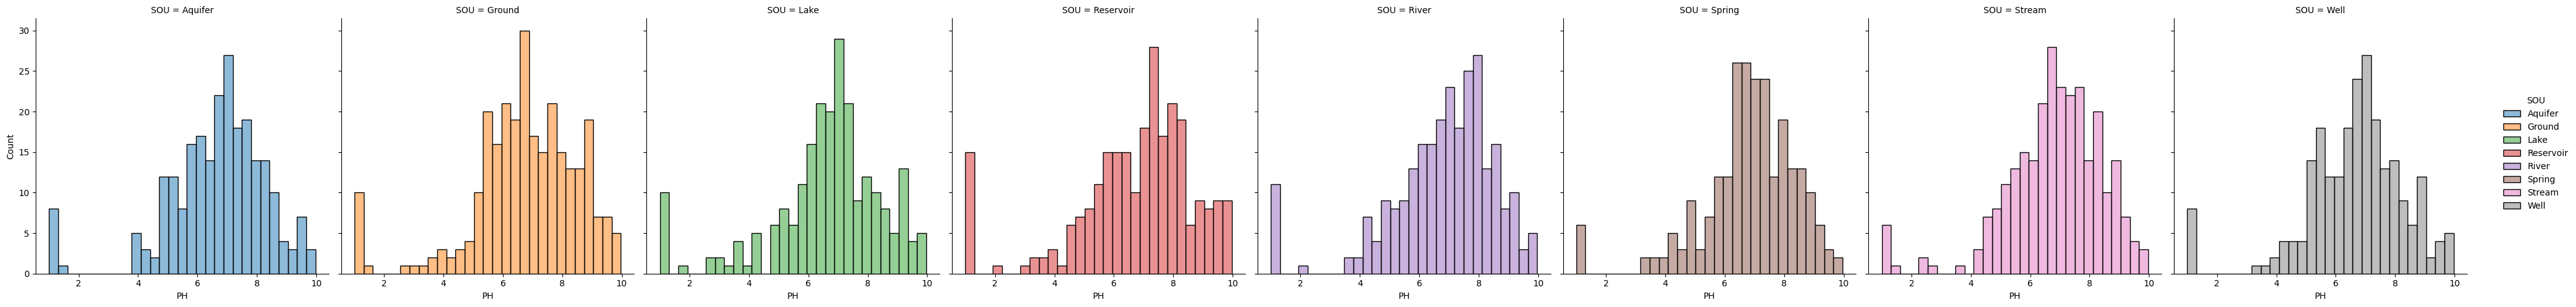

In [77]:
## Gráfico univariado de variable categórica
## En los siguientes gráficos de barras podemos visualizar el pH de
## todas las muestras utilizadas en la investigación agrupadas por
## origen de extracción

sns.displot(data=df, x="PH", hue="SOU", col="SOU")

In [78]:
## Calcularemos la media y la mediana del pH

print(df['PH'].mean().round(1))
print(df['PH'].median().round(1))

# media < mediana, la distribución es asimétrica con cola a la izquierda

6.7
6.9


<Axes: >

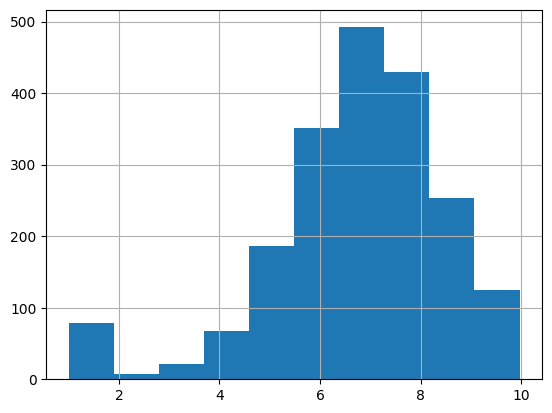

In [79]:
df['PH'].hist()

In [80]:
## Calculamos la desviación estandar.

df['PH'].std().round(2)

1.78

In [97]:
# Calcular el coeficiente de variación para cada columna
coef_var = df["PH"].std() / df['PH'].mean() *100
coef_var

## Dado que el resultado es <= a 30% nos dice que los datos de la muestra
## son realtivamente homogéneos. Por lo tanto, la medida es representativa

TypeError: could not convert string to float: '8,32'

In [89]:
y_pot = df.POT
y_ph = df.PH

AttributeError: 'DataFrame' object has no attribute 'POT'

In [88]:
import sklearn

y_pot = df.POT
y_ph = df.PH

sklearn.metrics.confusion_matrix(y_pot, y_ph)

AttributeError: 'DataFrame' object has no attribute 'POT'

In [ ]:
# definimos matriz de diseño X y vector respuesta y
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = pd.Series(data['target'])
# Separamos en entrenamiento/test en razon 80/30 %
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
# Creamos un KNN
modelo = KNeighborsClassifier(n_neighbors=3)
modelo.fit(X_train, y_train)
# Obtenemos las predicciones del modelo con X_test
preds = modelo.predict(X_test)
preds_train = modelo.predict(X_train)